In [39]:
import numpy as np
import xarray as xr
import gsw
import xrscipy.signal as dsp
import scipy.io as sio
import matplotlib.pyplot as plt
import seaborn as sns

In [21]:
def load_matfile(file):
    '''Read Matlab structure files and convert to numpy arrays'''
    import scipy.io as sio
    import numpy as np
    return sio.loadmat(file, struct_as_record=True, squeeze_me=True)

def datenum2datetime(datenum):
    '''Convert Matlab datenum to Python Datetime'''
    from datetime import datetime, timedelta
    return datetime.fromordinal(int(datenum)) + timedelta(days=datenum % 1) -\
        timedelta(days=366)

dn2dt_vec = np.vectorize(lambda x: datenum2datetime(x))

In [4]:
a = load_matfile('../data/adcp/KS-16-12.mat')

In [44]:
a

{'__header__': b'MATLAB 5.0 MAT-file, Platform: GLNXA64, Created on: Tue Sep  6 21:58:49 2016',
 '__version__': '1.0',
 '__globals__': [],
 'Jday_gmt': array([736565.16787037, 736565.16862269, 736565.16928241, ...,
        736569.88456019, 736569.88528935, 736569.88594907]),
 'z': array([  41.25999832,   65.25999832,   89.25999832,  113.25999832,
         137.25999832,  161.25999832,  185.25999832,  209.25999832,
         233.25999832,  257.25999832,  281.25999832,  305.25999832,
         329.25999832,  353.25999832,  377.25999832,  401.25999832,
         425.25999832,  449.25999832,  473.25999832,  497.25999832,
         521.25999832,  545.25999832,  569.25999832,  593.25999832,
         617.25999832,  641.25999832,  665.25999832,  689.25999832,
         713.25999832,  737.25999832,  761.25999832,  785.25999832,
         809.25999832,  833.25999832,  857.25999832,  881.25999832,
         905.25999832,  929.25999832,  953.25999832,  977.25999832,
        1001.25999832, 1025.25999832, 1

In [40]:
ds = xr.Dataset({  # define wanted variables here!
    'u': (['z', 'time'], a['u']),
    'v': (['z', 'time'], a['v'])},
    coords={'z': a['z'],
            'time': a['Jday_gmt']}
)

ds = ds.assign_coords(time=(dn2dt_vec(ds.time)))

In [41]:
ds['u'] = ds.u.where(ds.u>-30)
ds['v'] = ds.v.where(ds.u>-30)
if ds['z'].diff('z').mean()>0:
    ds['z'] = -ds['z']

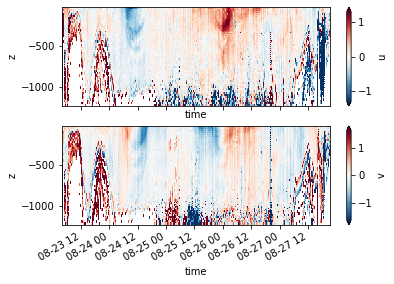

In [43]:
f, ax = plt.subplots(2,1, sharex=True)

ds.u.plot(robust=True, ax=ax[0])
ds.v.plot(robust=True, ax=ax[1]);

In [45]:
!jupyter nbconvert --to script read_adcp.ipynb

[NbConvertApp] Converting notebook read_adcp.ipynb to script
[NbConvertApp] Writing 1308 bytes to read_adcp.py
